##### 3.4.9 Softmax

In [65]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
def softmax(x):
    return np.exp(x)/sum(np.exp(x))
softmax(np.array([3,1,-3]))

array([0.87887824, 0.11894324, 0.00217852])

##### 3.4.11交叉熵

https://blog.csdn.net/tsyccnh/article/details/79163834

- 信息熵：信息量的大小和发生的概率相关。
- 相对熵（KL散度）：用于衡量对于同一个随机变量x的两个分布p(x)和q(x)之间的差异
- 交叉熵：相对熵 - 信息熵，信息熵是固定不变的

In [32]:
def Shannon_entropy(p):
    return sum(- p * np.log(p))
se = Shannon_entropy(np.array([0.9,0.1]))
print(se)

0.3250829733914482


In [33]:
#越小越相似
def KL_divergence(label,pred):
    return sum(label * np.log(label/pred))
kl = KL_divergence(np.array([0.9,0.1]),np.array([0.8,0.2]))
print(kl)

0.036690014034750584


In [34]:
def cross_entropy(label,pred):
    return sum(- label * np.log(pred))
ce = cross_entropy(np.array([0.9,0.1]),np.array([0.8,0.2]))
print(ce)

0.3617729874261988


In [35]:
print(kl,-se+ce)

0.036690014034750584 0.036690014034750584


#### 3.6 归一化

##### 3.6.6 Local Response Normalization（LRN）局部响应归一化
目的是为了消除lateral inhibition（横向抑制），简单来讲就是兴奋的神经细胞抑制周围神经细胞的能力。应用到深度神经网络中，目的是进行局部对比度增强，以便将局部特征在下一层得到表达。

https://zhuanlan.zhihu.com/p/87117010

In [98]:
img = cv2.imread("test.jpeg")
print(img.shape)

(968, 968, 3)


In [99]:
in_data = np.array(img).astype(np.float_)
print(in_data.shape)

(968, 968, 3)


In [132]:
def lrn(img,n,alpha=1e-4, beta=0.75, k=1.):
    output = np.zeros(in_data.shape)
    for i in range(img.shape[2]):
        left_bound = max(1,i + 1 - n//2)
        right_bound = min(i + 1 + n//2 ,img.shape[2])
        temp = np.zeros((in_data.shape[0],in_data.shape[1]))
        #print(left_bound,right_bound)
        
        for j in range(left_bound-1,right_bound):
            #print(temp.shape,img[:,:,j].shape)
            temp += img[:,:,j] * img[:,:,j]
            
        #print(temp)
        temp = temp * alpha
        temp += k
        temp = np.power(temp,beta)
        
        output[:,:,i] = img[:,:,i] / temp      
    return output
result = lrn(in_data,2)

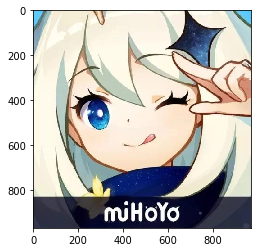

In [130]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

(968, 968, 3)


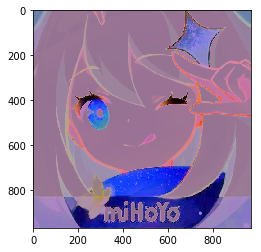

In [134]:
s = 255 * (result - np.min(result)) / np.max(result)
s = s.astype(np.uint8)
print(s.shape)
plt.imshow(cv2.cvtColor(s,cv2.COLOR_RGB2BGR))